In [97]:
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
import math
import matplotlib.pyplot as pl
import random

In [93]:
n = 8      #no. of qubits
N = 2**n   #dimension of matrix
t = 1      #no. of target states
length = list(range(n))
noi = math.floor(math.sqrt(N/t) * np.pi / 4)   #No of iterations
print("noi = ", noi)

#to set target states
target = np.zeros(t)
count = 0
flag = 0
i = 0
while(True):
    #to generate a random integer for target position
    a = random.randint(0,N-1)
    
    #checking if that number has already been chosen previously as target state
    for j in range(count):
        if(target[j] == a):
            flag = 1  #value is present in the target array
            
    #to store new value in target array
    if(flag == 0):
        #to store in count position of target array
        target[count] = a
        #updating count (position) value
        count += 1
        #checking for further iteration of i loop
        if(count == t):
            break
print("target = ",target)

phi = [a*np.pi/180 for a in range(115,126,1)]
print("phi = ",phi)

phi_m = [a*180/np.pi for a in phi]
print("phi_m = ",phi_m)

e_iphi = [complex(np.cos(a),np.sin(a)) for a in phi]
print("e_iphi = ",e_iphi)

theta    = [np.pi*2/3]
e_itheta = [complex(np.cos(a),np.sin(a)) for a in theta]
theta_m  = [a*180/np.pi for a in theta]
print("theta_m = ",theta_m)
print("e_itheta = ",e_itheta)

#array to store coherence values after each suboperation in every grover's iteration
data   = np.zeros((len(phi),noi * 4))   #to store coherence values
x_axis = list(range(noi * 4))           #to store iteration number

print("len(phi) = ",len(phi))

noi =  12
target =  [196.]
phi =  [2.007128639793479, 2.0245819323134224, 2.0420352248333655, 2.0594885173533086, 2.076941809873252, 2.0943951023931953, 2.111848394913139, 2.129301687433082, 2.1467549799530254, 2.1642082724729685, 2.1816615649929116]
phi_m =  [114.99999999999999, 116.0, 117.0, 118.0, 119.0, 119.99999999999999, 121.0, 122.0, 123.00000000000001, 124.0, 124.99999999999999]
e_iphi =  [(-0.42261826174069933+0.90630778703665j), (-0.4383711467890775+0.8987940462991669j), (-0.45399049973954675+0.8910065241883679j), (-0.46947156278589053+0.8829475928589271j), (-0.484809620246337+0.8746197071393959j), (-0.4999999999999998+0.8660254037844387j), (-0.5150380749100543+0.8571673007021123j), (-0.5299192642332048+0.8480480961564261j), (-0.5446390350150271+0.838670567945424j), (-0.5591929034707467+0.8290375725550417j), (-0.5735764363510458+0.819152044288992j)]
theta_m =  [119.99999999999999]
e_itheta =  [(-0.4999999999999998+0.8660254037844387j)]
len(phi) =  11


In [94]:
def iteration(i,a):
    qc.barrier()
    count = i*4
    qc.append(O_operator,length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied O operator to |ψ2⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ2⟩ = ",coherence)
    data[a][count] = coherence
    
    qc.h(length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ1⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ1⟩ = ",coherence)
    data[a][count+1] = coherence
    
    qc.append(P_operator,length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied P operator to |ψ4⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ4⟩ = ",coherence)
    data[a][count+2] = coherence

    qc.h(length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ5⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ5⟩ = ",coherence)
    data[a][count+3] = coherence

for a in range(len(phi)):
    print("======================================== FOR ϕ = ", phi_m[a],"========================================")
    qc = QuantumCircuit(n)
    backend = Aer.get_backend('statevector_simulator')
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("initialised |ψ0⟩", state.draw('latex'))
    density_operator = state.to_operator()
    #print(density_operator.data)
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ0⟩ = ",coherence)

    qc.h(length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ1⟩", state.draw('latex'))
    density_operator = state.to_operator()
    #print(density_operator.data)
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ1⟩ = ",coherence)

    #defining generalised O Operator
    count = 0
    O_operator = Operator(np.zeros((N,N)))
    for i in range(N):
        for j in range(N):
            if(i != j):   #off diagonal elements
                O_operator.data[i][j] = 0
            else:    #diagonal elements
                flag = 0
                for k in range(t):
                    if(i == target[k]):
                        O_operator.data[i][j] = e_iphi[a]
                        count += 1
                        flag = 1
                        break
                if(flag == 0):
                    O_operator.data[i][j] = 1            

    #defining generalised P Operator
    P_operator = Operator(np.zeros((N,N)))
    for i in range(N):
        for j in range(N):
            if(i != j):    #off-diagonal elements
                P_operator.data[i][j] = 0
            else:
                if(i==0 & j==0):   #for 1st element only
                    P_operator.data[i][j] = -1*e_itheta[0]
                else:
                    P_operator.data[i][j] = -1

    #sending out for x iterations of grover's operator
    for i in range(noi):
        print("--------",(i+1)," ITERATION OF GROVER'S ITERATION--------")
        iteration(i,a)

======================================== FOR ϕ =  114.99999999999999 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  6.15371568620847


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  6.15371568620847


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.4001806334557
-------- 2  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.4001806334557


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  17.627187278676832


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  17.627187278676836


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  244.2764981946391
-------- 3  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  244.2764981946391


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  33.83478441867306


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  33.83478441867306


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  230.9573950043355
-------- 4  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  230.9573950043355


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  53.94166628063446


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  53.94166628063446


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  213.15734640516808
-------- 5  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  213.15734640516808


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  76.90954218139983


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  76.90954218139983


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  191.84437005692504
-------- 6  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  191.84437005692504


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  101.55380403515183


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  101.55380403515183


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  168.1822234510844
-------- 7  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  168.1822234510844


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  126.60939784046909


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  126.60939784046909


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  143.47041661935316
-------- 8  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  143.47041661935316


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  150.80257442595337


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  150.80257442595337


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  119.08053176005762
-------- 9  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  119.08053176005762


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  172.925658089361


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  172.925658089361


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  96.39278680462762
-------- 10  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  96.39278680462762


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  191.91191011120804


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  191.91191011120804


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  76.73768641783995
-------- 11  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  76.73768641783995


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  206.9060993572034


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  206.9060993572034


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  61.34469544380289
-------- 12  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  61.34469544380289


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  217.3194510721101


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  217.3194510721101


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  51.28514244940733
======================================== FOR ϕ =  116.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  6.203095789601117


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  6.203095789601117


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.37909698355745
-------- 2  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.37909698355745


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  17.79346006685585


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  17.79346006685585


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  244.187355895833
-------- 3  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  244.187355895833


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  34.20013002717009


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  34.20013002717009


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  230.73084378800127
-------- 4  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  230.73084378800127


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  54.60982856854132


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  54.60982856854132


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  212.68992210783986
-------- 5  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  212.68992210783986


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  78.00914697204638


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  78.00914697204638


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  190.99108222509972
-------- 6  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  190.99108222509972


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  103.23729923366506


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  103.23729923366506


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  166.7530858299391
-------- 7  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  166.7530858299391


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  129.047125106049


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  129.047125106049


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  141.23117055909023
-------- 8  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  141.23117055909023


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  154.1718770641043


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  154.1718770641043


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  115.75748527234933
-------- 9  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  115.75748527234933


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  177.39554932377018


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  177.39554932377018


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  91.68158201887739
-------- 10  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  91.68158201887739


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  197.62519343076332


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  197.62519343076332


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  70.31702979341041
-------- 11  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  70.31702979341041


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  213.9644314797846


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  213.9644314797846


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  52.9017642116788
-------- 12  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  52.9017642116788


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  225.78492879436226


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  225.78492879436226


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  40.57375517540162
======================================== FOR ϕ =  117.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  6.251955565798505


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  6.251955565798504


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.35852386976393
-------- 2  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.35852386976393


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  17.956151565420353


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  17.956151565420353


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  244.10275647687965
-------- 3  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  244.10275647687965


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  34.55150611113076


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  34.55150611113076


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  230.5224210887395
-------- 4  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  230.5224210887395


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  55.239432102825084


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  55.239432102825084


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  212.27236569398806
-------- 5  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  212.27236569398806


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  79.02340368539589


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  79.02340368539589


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  190.2478003935781
-------- 6  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  190.2478003935781


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  104.75846837177733


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  104.75846837177733


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  165.53319843425422
-------- 7  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  165.53319843425422


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  131.20854442390035


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  131.20854442390035


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  139.34930043718214
-------- 8  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  139.34930043718214


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  157.1092005089765


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  157.1092005089765


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  112.99600102477937
-------- 9  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  112.99600102477937


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  181.23386463350303


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  181.23386463350303


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  87.7944298069538
-------- 10  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  87.7944298069538


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  202.4623999371556


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  202.4623999371556


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  65.03418401443143
-------- 11  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  65.03418401443143


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  219.8533952950985


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  219.8533952950985


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  45.93631605985493
-------- 12  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  45.93631605985493


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  232.72561889876965


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  232.72561889876965


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  31.650994015462693
======================================== FOR ϕ =  118.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  6.300284364643399


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  6.300284364643399


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.33847028701436
-------- 2  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.33847028701436


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  18.11515721305894


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  18.115157213058936


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  244.02279056002803
-------- 3  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  244.02279056002803


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  34.88844586968353


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  34.88844586968353


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  230.33254328173797
-------- 4  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  230.33254328173797


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  55.829052577803324


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  55.829052577803324


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  211.90601577425315
-------- 5  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  211.90601577425315


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  79.94884288121469


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  79.94884288121469


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  189.61802418180957
-------- 6  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  189.61802418180957


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  106.11005030894789


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  106.11005030894789


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  164.5305436853047
-------- 7  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  164.5305436853047


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  133.08009291437136


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  133.08009291437136


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  137.84133858045527
-------- 8  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  137.84133858045527


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  159.59149702416195


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  159.59149702416195


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  110.82801631943369
-------- 9  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  110.82801631943369


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  184.4047435326973


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  184.4047435326973


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  84.79009856316343
-------- 10  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  84.79009856316343


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  206.37265201607698


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  206.37265201607698


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  60.993824679451286
-------- 11  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  60.99382467945131


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  224.5075008052268


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  224.5075008052268


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  40.62884786429213
-------- 12  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  40.62884786429213


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  238.05999610719044


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  238.05999610719044


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  24.801604388256255
======================================== FOR ϕ =  119.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  6.348071639094346


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  6.3480716390943455


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.3189449943307
-------- 2  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.3189449943307


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  18.270374459879935


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  18.270374459879935


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  243.94754420464403
-------- 3  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  243.94754420464403


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  35.21049809121781


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  35.21049809121781


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  230.16159389369565
-------- 4  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  230.16159389369565


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  56.37733864459818


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  56.37733864459816


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  211.59206631656156
-------- 5  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  211.59206631656156


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  80.7822421818392


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  80.7822421818392


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  189.1047803147335
-------- 6  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  189.1047803147335


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  107.2854532566048


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  107.2854532566048


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  163.75183839313695
-------- 7  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  163.75183839313695


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  134.64974948865623


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  134.64974948865623


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  136.72088482559323
-------- 8  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  136.72088482559323


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  161.5988677211826


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  161.5988677211826


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  109.27938715279188
-------- 9  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  109.27938715279188


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  186.8782568886892


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  186.8782568886892


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  82.71592325888
-------- 10  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  82.71592325888


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  209.31601786125574


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  209.31601786125557


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  58.28169614824367
-------- 11  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  58.28169614824367


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  227.88329736405476


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  227.88329736405476


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  37.137305536288906
-------- 12  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  37.137305536288906


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  241.7590094698866


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  241.7590094698866


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  20.317767901281726
======================================== FOR ϕ =  119.99999999999999 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  6.395306948164084


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  6.395306948164084


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.29995651439577
-------- 2  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.29995651439577


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  18.421702863186248


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  18.421702863186248


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  243.8770988005523
-------- 3  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  243.8770988005523


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  35.517228004927446


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  35.517228004927446


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  230.00992262379668
-------- 4  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  230.00992262379668


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  56.883016146407776


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  56.883016146407776


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  211.3315615193185
-------- 5  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  211.3315615193185


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  81.52064110666969


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  81.52064110666969


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  188.71060272300406
-------- 6  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  188.71060272300406


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  108.27879509835188


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  108.27879509835188


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  163.20246920489234
-------- 7  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  163.20246920489234


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  135.90712186603895


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  135.90712186603892


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  135.99841694819625
-------- 8  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  135.99841694819625


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  163.1146984955566


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  163.1146984955566


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  108.36934907369455
-------- 9  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  108.36934907369455


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  188.63045628920693


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  188.63045628920693


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  81.60622268326118
-------- 10  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  81.60622268326118


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  211.26278109693106


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  211.26278109693106


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  56.959626175679645
-------- 11  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  56.959626175679645


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  229.95571414892083


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  229.95571414892083


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  35.58128649511517
-------- 12  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  35.58128649511517


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  243.83997241645247


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  243.83997241645247


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  18.470216358891175
======================================== FOR ϕ =  121.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  6.441979959657722


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  6.441979959657722


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.28151312939272
-------- 2  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.28151312939272


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  18.56904418108008


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  18.569044181080073


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  243.8115309657212
-------- 3  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  243.8115309657212


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  35.80821810365858


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  35.80821810365858


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  229.87784444078446
-------- 4  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  229.87784444078446


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  57.34489214413923


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  57.34489214413923


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  211.12539124651417
-------- 5  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  211.12539124651417


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  82.16135486178014


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  82.16135486178014


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  188.43751548701826
-------- 6  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  188.43751548701826


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  109.08493982706783


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  109.08493982706783


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  162.88643923873653
-------- 7  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  162.88643923873653


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  136.8435219781105


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  136.8435219781105


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  135.6811387390646
-------- 8  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  135.6811387390646


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  164.1257655579972


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  164.1257655579972


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  108.11009175984839
-------- 9  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  108.11009175984839


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  189.64333701696563


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  189.64333701696563


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  81.48102014969234
-------- 10  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  81.48102014969234


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  212.19230996989063


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  212.19230996989063


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  57.06100724338644
-------- 11  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  57.06100724338644


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  230.71140367713238


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  230.71140367713235


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  36.022329117905514
-------- 12  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  36.022329117905514


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  244.33654989164123


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  244.33654989164123


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  19.408311129244396
======================================== FOR ϕ =  122.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  6.48808045304356


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  6.48808045304356


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.26362287728884
-------- 2  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.26362287728884


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  18.712302464453952


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  18.712302464453956


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  243.75091244635365
-------- 3  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  243.75091244635365


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  36.08306893906897


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  36.083068939068966


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  229.76563876444777
-------- 4  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  229.76563876444777


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  57.76185872174474


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  57.76185872174474


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  210.97428706180258
-------- 5  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  210.97428706180258


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  82.70198703016781


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  82.70198703016781


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  188.28701877363275
-------- 6  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  188.28701877363275


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  109.69952998019635


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  109.69952998019635


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  162.80632674011275
-------- 7  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  162.80632674011275


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  137.45203024794674


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  137.45203024794674


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  135.77287014554625
-------- 8  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  135.77287014554625


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  164.62231802450685


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  164.62231802450685


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  108.50647289523717
-------- 9  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  108.50647289523717


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  189.9047743141527


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  189.9047743141527


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  82.34523687682945
-------- 10  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  82.34523687682945


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  212.0919358158155


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  212.0919358158155


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  58.58801815915898
-------- 11  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  58.58801815915898


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  230.1416161290278


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  230.1416161290278


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  38.45077336742361
-------- 12  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  38.45077336742361


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  243.2538252251775


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  243.2538252251775


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  23.066478640974438
======================================== FOR ϕ =  123.00000000000001 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  6.533598322135754


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  6.533598322135754


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.24629354929166
-------- 2  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.24629354929166


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  18.851384146449792


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  18.851384146449792


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  243.69531002803717
-------- 3  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  243.69531002803717


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  36.34139988538582


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  36.34139988538582


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  229.67354872264625
-------- 4  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  229.67354872264625


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  58.1328965551785


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  58.1328965551785


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  210.87881886571662
-------- 5  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  210.87881886571662


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  83.14044110460404


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  83.14044110460404


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  188.26007789416272
-------- 6  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  188.26007789416272


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  110.1190149835682


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  110.11901498356819


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  162.9632564121415
-------- 7  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  162.9632564121415


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  137.72754930900578


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  137.72754930900578


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  136.27398278147857
-------- 8  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  136.27398278147857


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  164.5981451946559


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  164.5981451946559


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  109.55588958637166
-------- 9  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  109.55588958637166


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  189.40849542882466


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  189.40849542882466


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  84.18847672141177
-------- 10  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  84.18847672141177


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  210.95632458246544


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  210.95632458246544


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  61.511535055324195
-------- 11  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  61.5115350553242


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  228.23873562343204


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  228.23873562343204


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  42.78895971821237
-------- 12  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  42.78895971821237


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  240.5512123336696


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  240.5512123336696


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  29.214812366690484
======================================== FOR ϕ =  124.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  6.57852357785552


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  6.57852357785552


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.2295326884256
-------- 2  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.2295326884256


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  18.98619813081186


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  18.98619813081186


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  243.64478545161447
-------- 3  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  243.64478545161447


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  36.58284987087339


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  36.58284987087339


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  229.60178050222956
-------- 4  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  229.60178050222956


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  58.45707823825474


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  58.45707823825474


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  210.83939216860037
-------- 5  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  210.83939216860037


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  83.47493081834402


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  83.47493081834402


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  188.35711559008988
-------- 6  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  188.35711559008988


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  110.3406753182071


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  110.34067531820712


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  163.35688389496164
-------- 7  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  163.35688389496164


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  137.66684768596332


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  137.66684768596332


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  137.18138271420568
-------- 8  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  137.18138271420568


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  164.0506348352274


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  164.0506348352274


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  111.24831479775837
-------- 9  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  111.24831479775837


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  188.15413500090708


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  188.15413500090708


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  86.98542676847157
-------- 10  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  86.98542676847154


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  208.78767470847106


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  208.78767470847106


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  65.77370542258613
-------- 11  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  65.77370542258613


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  224.99898033982248


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  224.99898033982248


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  48.90790973348022
-------- 12  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  48.90790973348022


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  236.17448919602927


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  236.17448919602927


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  37.57324662767007
======================================== FOR ϕ =  124.99999999999999 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  6.622846350986526


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  6.622846350986526


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.21334758493083
-------- 2  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.21334758493083


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  19.11665587680265


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  19.11665587680265


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  243.59939532944315
-------- 3  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  243.59939532944315


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  36.80707807696011


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  36.80707807696011


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  229.55050277911053
-------- 4  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  229.55050277911053


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  58.7335713471892


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  58.7335713471892


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  210.85624601111076
-------- 5  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  210.85624601111076


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  83.70398922615537


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  83.70398922615537


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  188.57800761565736
-------- 6  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  188.57800761565736


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  110.36264245295666


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  110.36264245295666


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  163.9853936324468
-------- 7  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  163.9853936324468


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  137.26859377920485


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  137.26859377920485


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  138.4885408944661
-------- 8  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  138.4885408944661


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  162.98082609658118


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  162.98082609658118


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  113.56649422447771
-------- 9  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  113.56649422447771


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  186.14739088183418


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  186.14739088183418


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  90.69679550605252
-------- 10  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  90.69679550605252


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  205.59673848883605


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  205.59673848883605


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  71.29220927116496
-------- 11  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  71.29220927116496


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  220.42966781071794


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  220.42966781071794


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  56.64577322582518
-------- 12  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  56.64577322582518


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  230.10032650013704


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  230.10032650013704


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  47.86248677661748


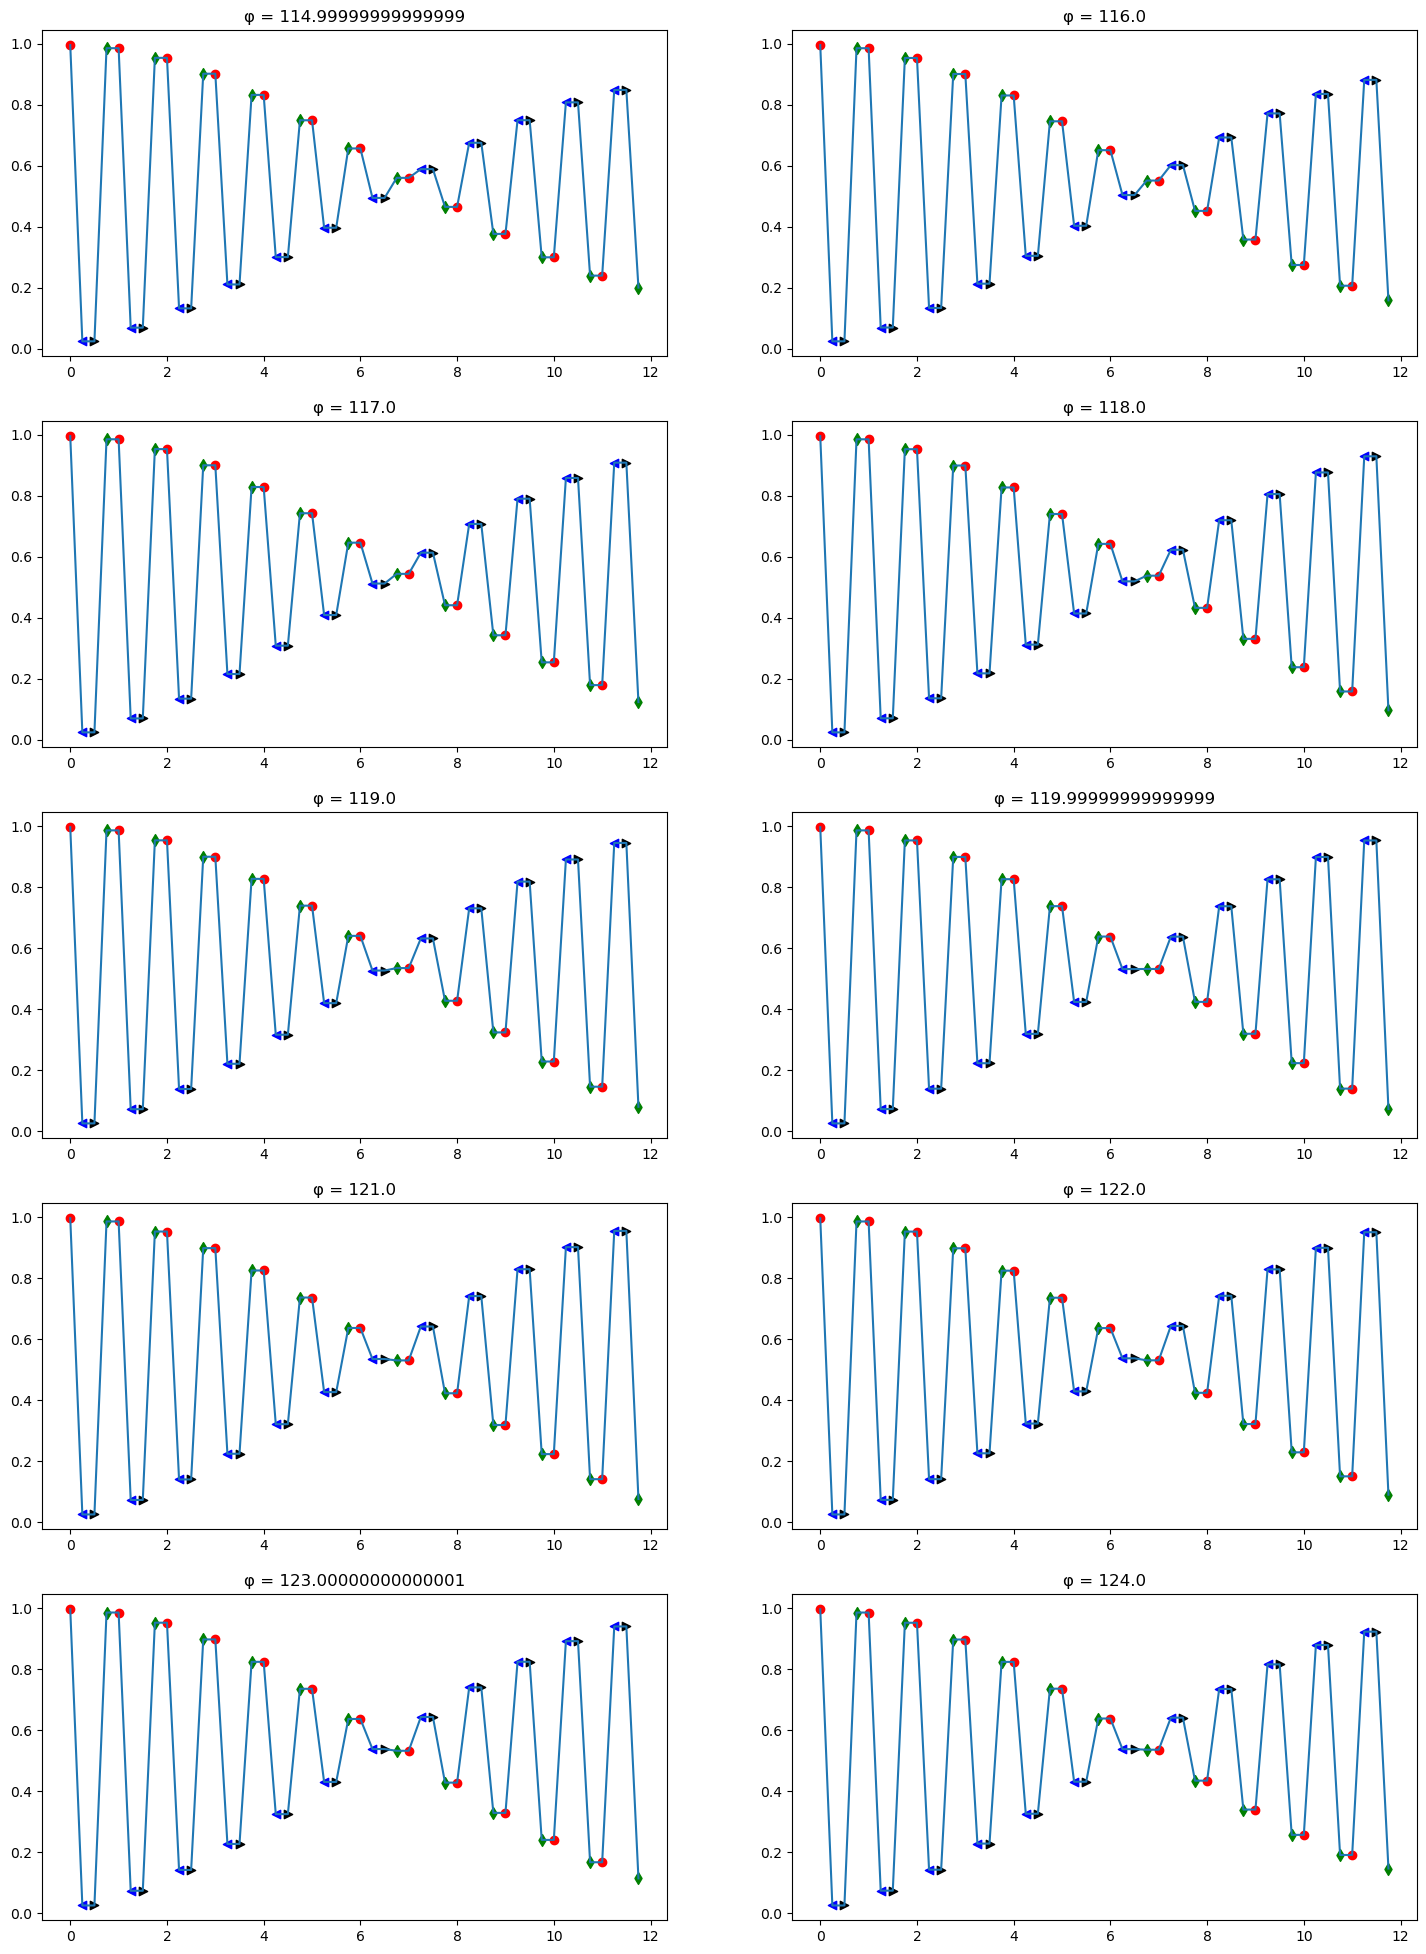

In [95]:
data_N = [a/N for a in data]
xa     = [a/4 for a in x_axis]

a = len(phi)//2
b = len(phi)//a
fig, axs = pl.subplots(a,b, figsize=(10,10))
count = 0
for i in range(a):
    for j in range(b):
        axs[i,j].scatter(xa[::4], data_N[count][::4], color='red', label='O')
        axs[i,j].scatter(xa[1::4], data_N[count][1::4], color='blue', marker='<', label='H')
        axs[i,j].scatter(xa[2::4], data_N[count][2::4], color='black', marker='>', label='P')
        axs[i,j].scatter(xa[3::4], data_N[count][3::4], color='green', marker='d', label='H')
        axs[i,j].plot(xa, data_N[count])
        axs[i,j].set_title("φ = " + str(phi[count]*180/np.pi))
        count += 1
        pl.subplots_adjust(top=2, right=1.5)
pl.show()

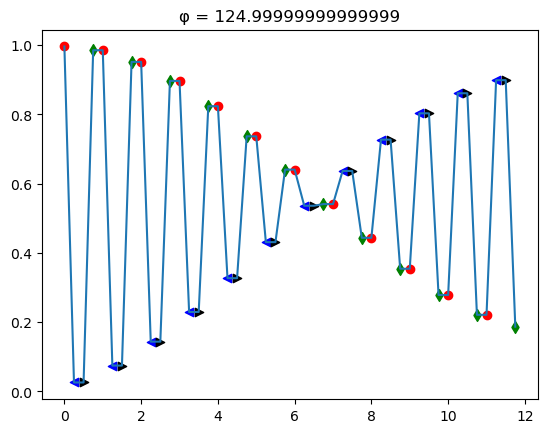

In [96]:
pl.scatter(xa[::4], data_N[count][::4], color='red', label='O')
pl.scatter(xa[1::4], data_N[count][1::4], color='blue', marker='<', label='H')
pl.scatter(xa[2::4], data_N[count][2::4], color='black', marker='>', label='P')
pl.scatter(xa[3::4], data_N[count][3::4], color='green', marker='d', label='H')
pl.plot(xa, data_N[count])
pl.title("φ = " + str(phi[count]*180/np.pi))
pl.show()